In [1]:
import pandas as pd
from TrajectoryClusteringAnalysis.tca import TCA

## Load data

In [2]:
df = pd.read_csv('../data/dataframe_test.csv')
df.head()

,id,month,care_status,sex,age,education,wealth,distance_clinic
0,3,0.0,D,1.0,1.0,2.0,2.0,1.0
1,3,1.0,D,1.0,1.0,2.0,2.0,1.0
2,3,2.0,D,1.0,1.0,2.0,2.0,1.0
3,3,3.0,D,1.0,1.0,2.0,2.0,1.0
4,3,4.0,D,1.0,1.0,2.0,2.0,1.0


## Preprocessing data:
### convert data from long format to wide format

In [3]:
# Sélectionner les colonnes pertinentes pour l'analyse
selected_cols = df[['id', 'month', 'care_status']]
# Créer un tableau croisé des données en format large
#       -> Chaque individu est sur une ligne.
#       -> Les mesures dans le temps (Temps1, Temps2, Temps3) sont des colonnes distinctes.
pivoted_data = selected_cols.pivot(index='id', columns='month', values='care_status')
pivoted_data['id'] = pivoted_data.index
pivoted_data = pivoted_data[['id'] + [col for col in pivoted_data.columns if col != 'id']]
# Renommer les colonnes avec un préfixe "month_"
pivoted_data.columns = ['id'] + ['month_' + str(int(col)+1) for col in pivoted_data.columns[1:]]
# Sélectionner un échantillon aléatoire de 10% des données
pivoted_data_random_sample = pivoted_data.sample(frac=0.1, random_state=42).reset_index(drop=True)
pivoted_data_random_sample

,id,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_42,month_43,month_44,month_45,month_46,month_47,month_48,month_49,month_50,month_51
0,4971,D,D,D,D,D,D,D,D,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7484,D,D,D,D,D,D,D,D,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1252,D,D,D,D,D,D,D,D,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9004,D,D,D,D,D,D,D,D,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6229,D,T,T,D,D,D,D,D,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,5315,D,D,D,D,C,C,C,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,4411,D,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,1898,D,D,D,D,D,D,D,D,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,5693,D,D,D,D,D,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## pakage initialization

In [4]:
tca = TCA(data=pivoted_data_random_sample,
              id='id',
              alphabet=['D', 'C', 'T', 'S'],
              states=["diagnostiqué", "en soins", "sous traitement", "inf. contrôlée"])

INFO:root:TCA object initialized successfully


Dataset :
data shape:  (293, 52)
state coding:
   alphabet            label  label encoded
0        D     diagnostiqué              1
1        C         en soins              2
2        T  sous traitement              3
3        S   inf. contrôlée              4


## Distance Hamming

In [5]:
distance_matrix = tca.compute_distance_matrix(metric='dtw', substitution_cost_matrix=None)
print("distance matrix :\n",distance_matrix)

INFO:root:Calculating distance matrix using metric: dtw...
100%|██████████| 293/293 [00:06<00:00, 46.40it/s] 
INFO:root:Time taken for computation: 6.32 seconds


distance matrix :
 [[0.         0.         0.43080804 ... 0.         0.         0.24743583]
 [0.         0.         0.43080804 ... 0.         0.         0.28867513]
 [0.43080804 0.43080804 0.         ... 0.43080804 0.43080804 0.13925007]
 ...
 [0.         0.         0.43080804 ... 0.         0.         0.34641016]
 [0.         0.         0.43080804 ... 0.         0.         0.57735027]
 [0.24743583 0.28867513 0.13925007 ... 0.34641016 0.57735027 0.        ]]


INFO:root:Computing the linkage matrix using method: ward...
INFO:root:Linkage matrix computed successfully


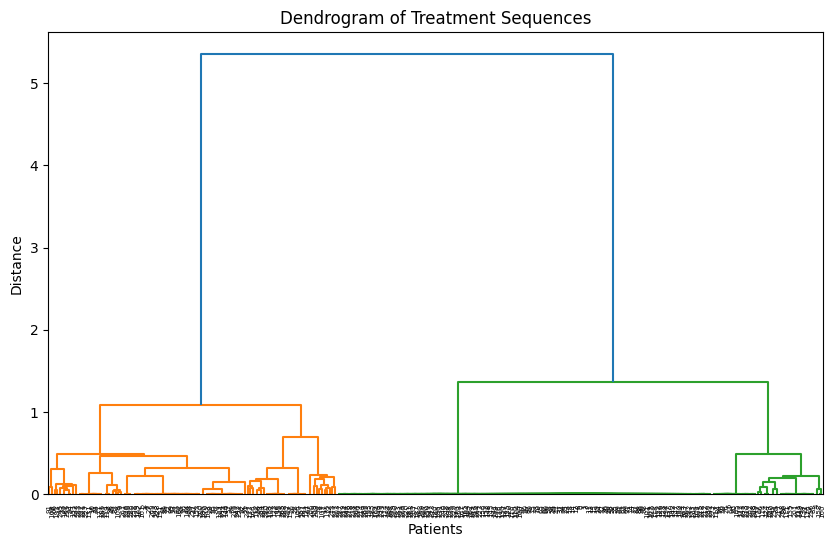

In [6]:
linkage_matrix = tca.hierarchical_clustering(distance_matrix)
tca.plot_dendrogram(linkage_matrix)

### plot heatmap with distance hamming

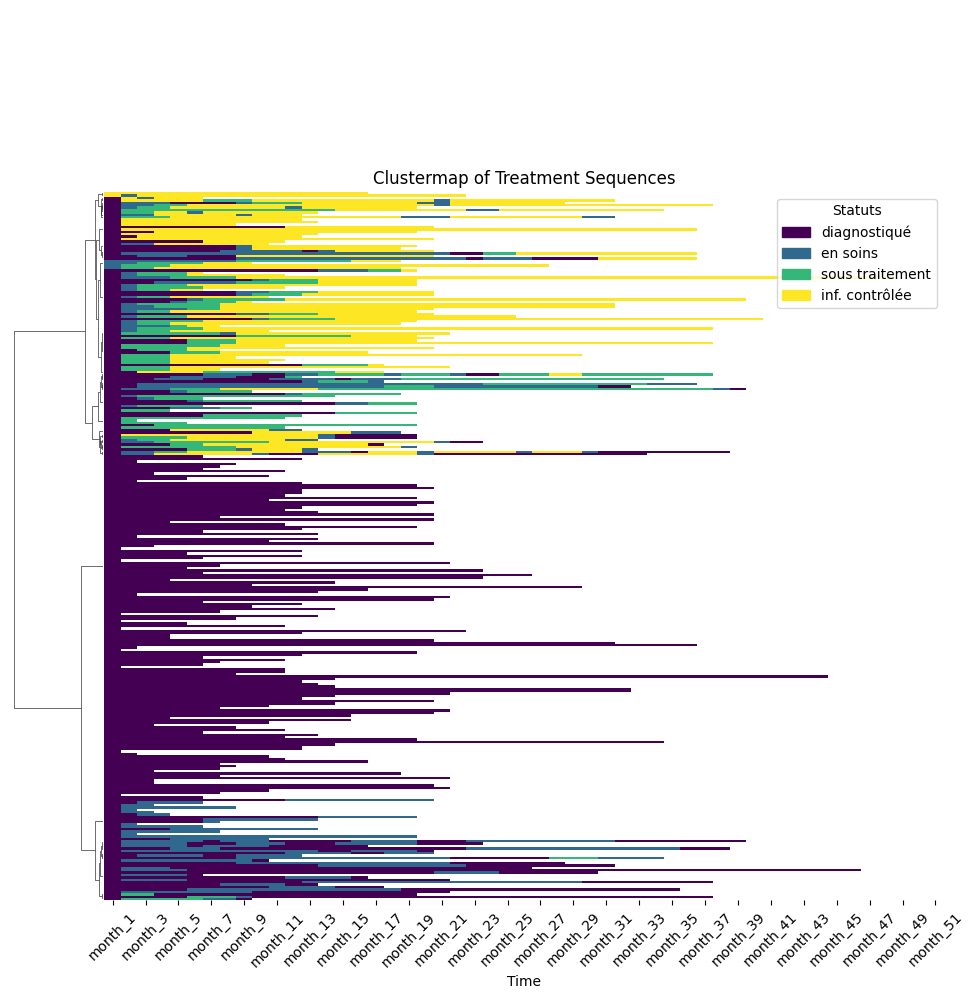

In [7]:
tca.plot_clustermap(linkage_matrix)

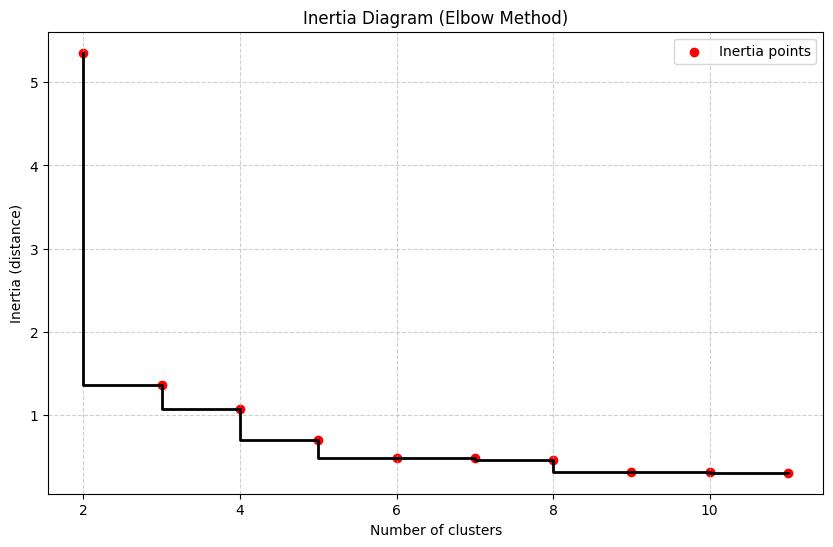

In [8]:
tca.plot_inertia(linkage_matrix)

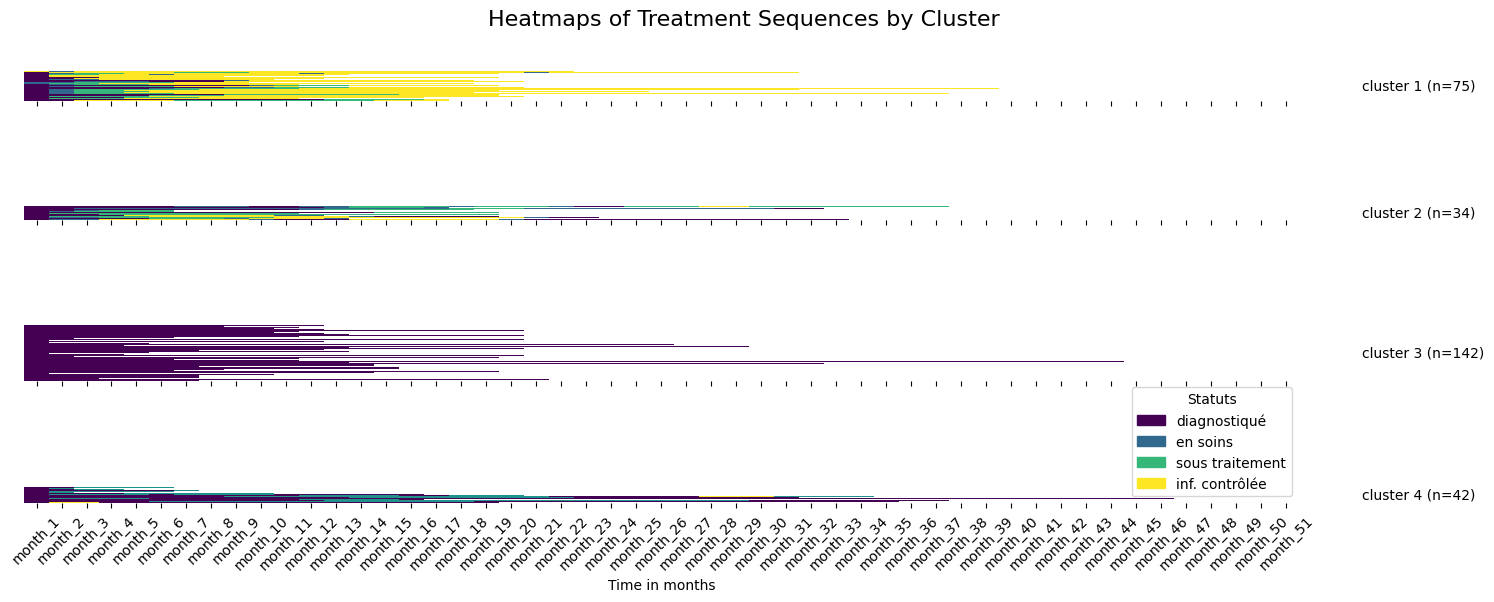

In [9]:
clusters = tca.assign_clusters(linkage_matrix, num_clusters=4)
    
tca.plot_cluster_heatmaps(clusters, sorted=False)

In [10]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import  squareform
silhouette_score(distance_matrix, clusters)

0.389265278743865

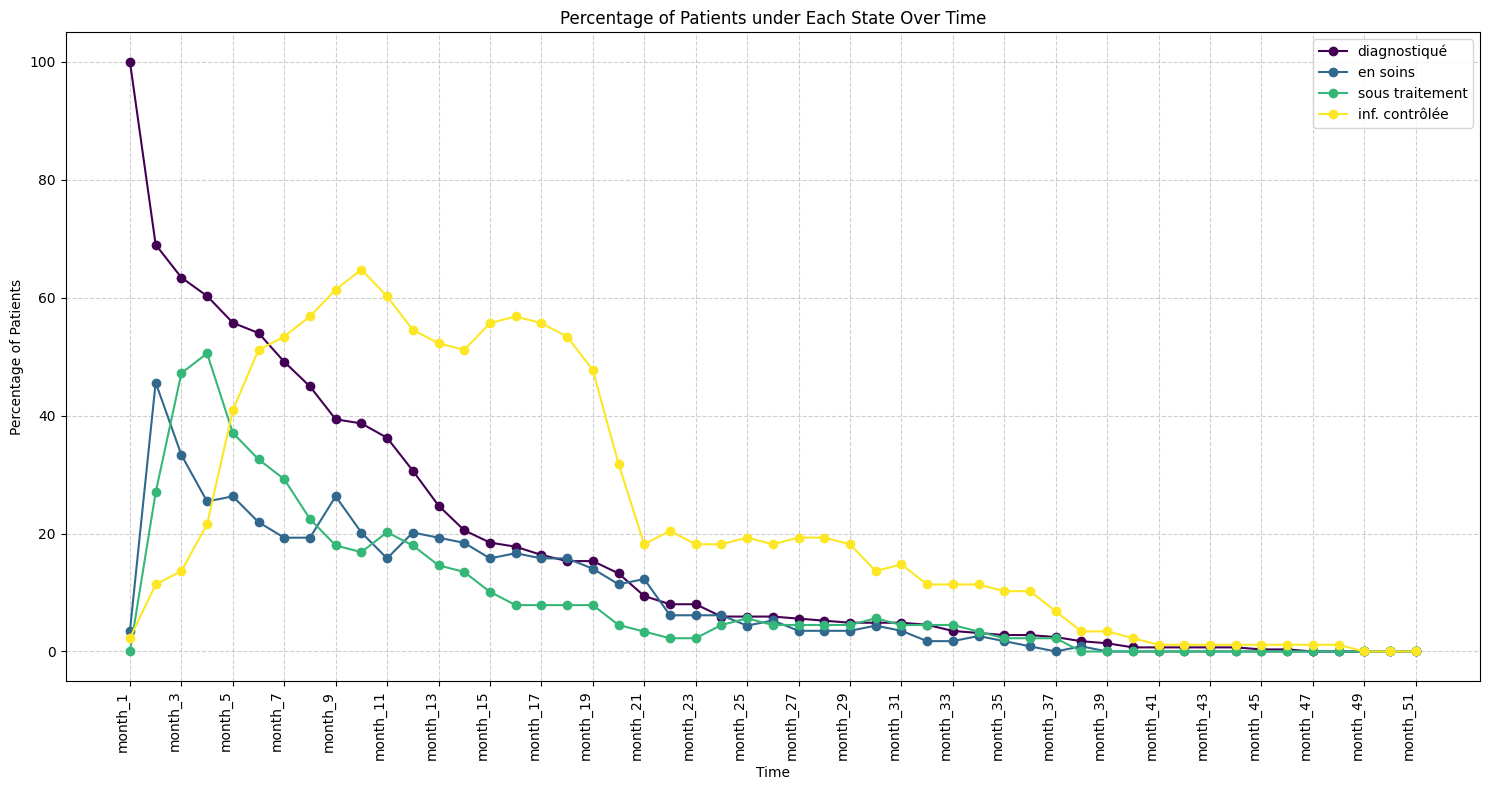

In [11]:
tca.plot_treatment_percentage()

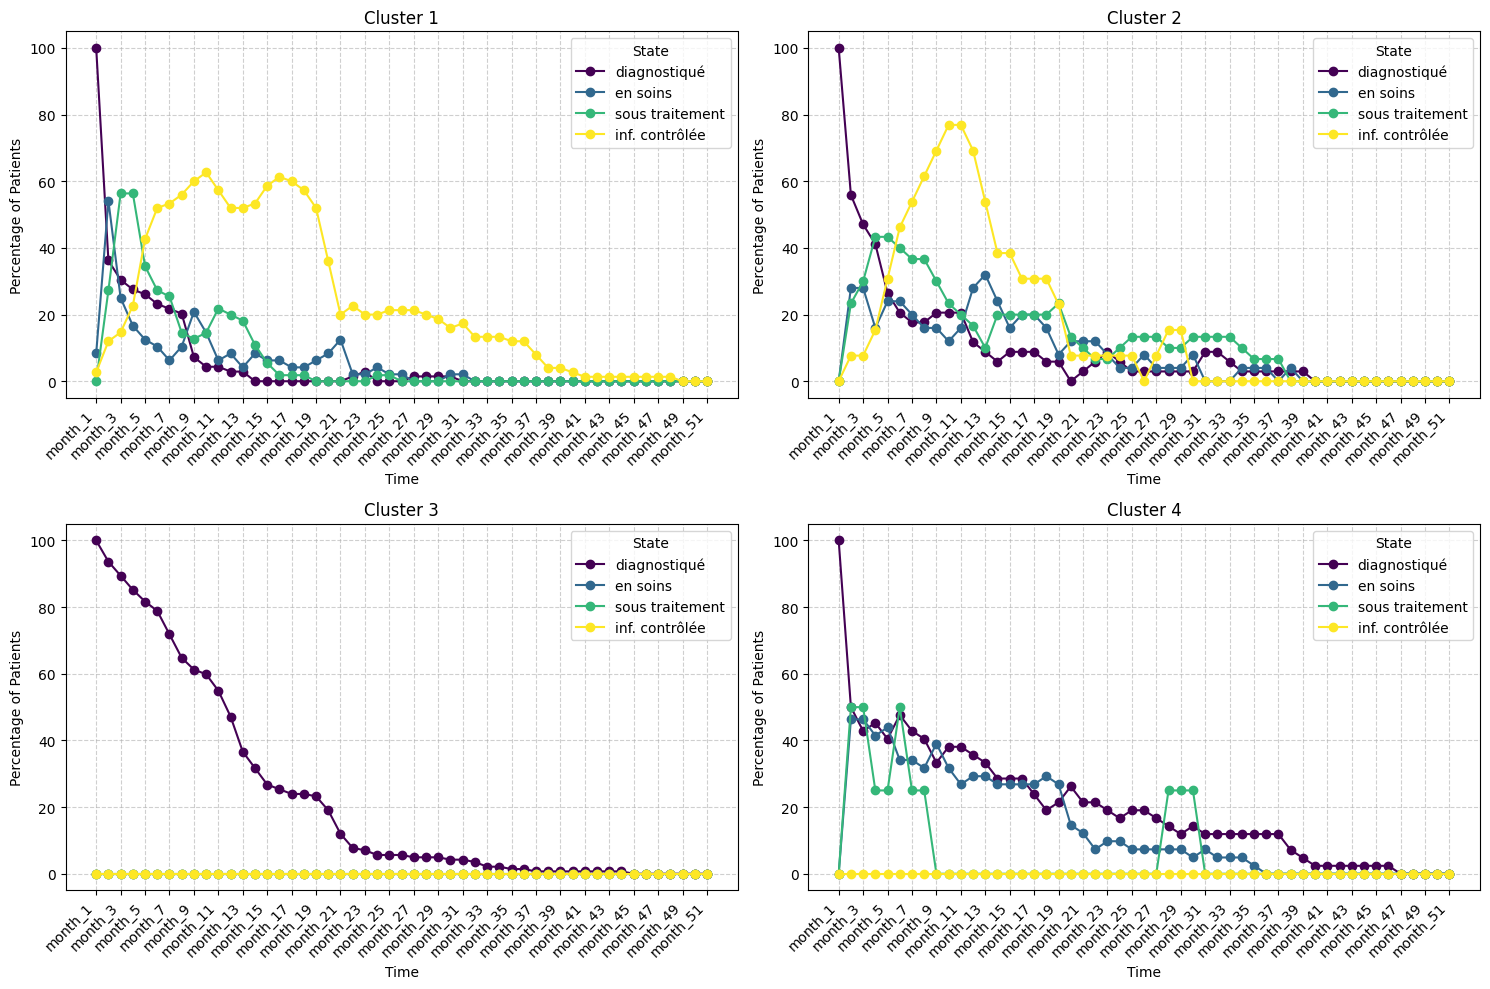

In [12]:
tca.plot_treatment_percentage(clusters=clusters)

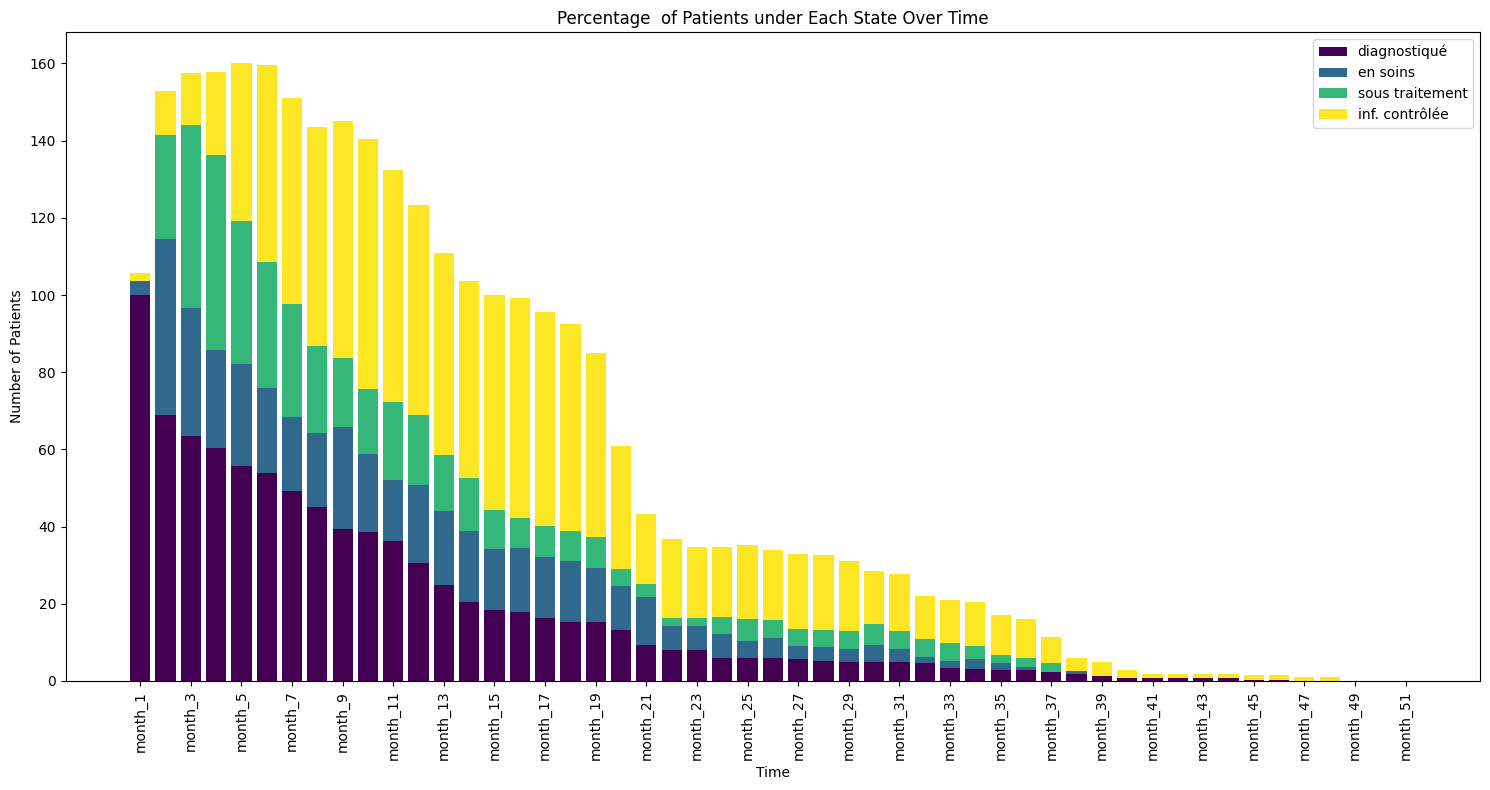

In [13]:

tca.bar_treatment_percentage()

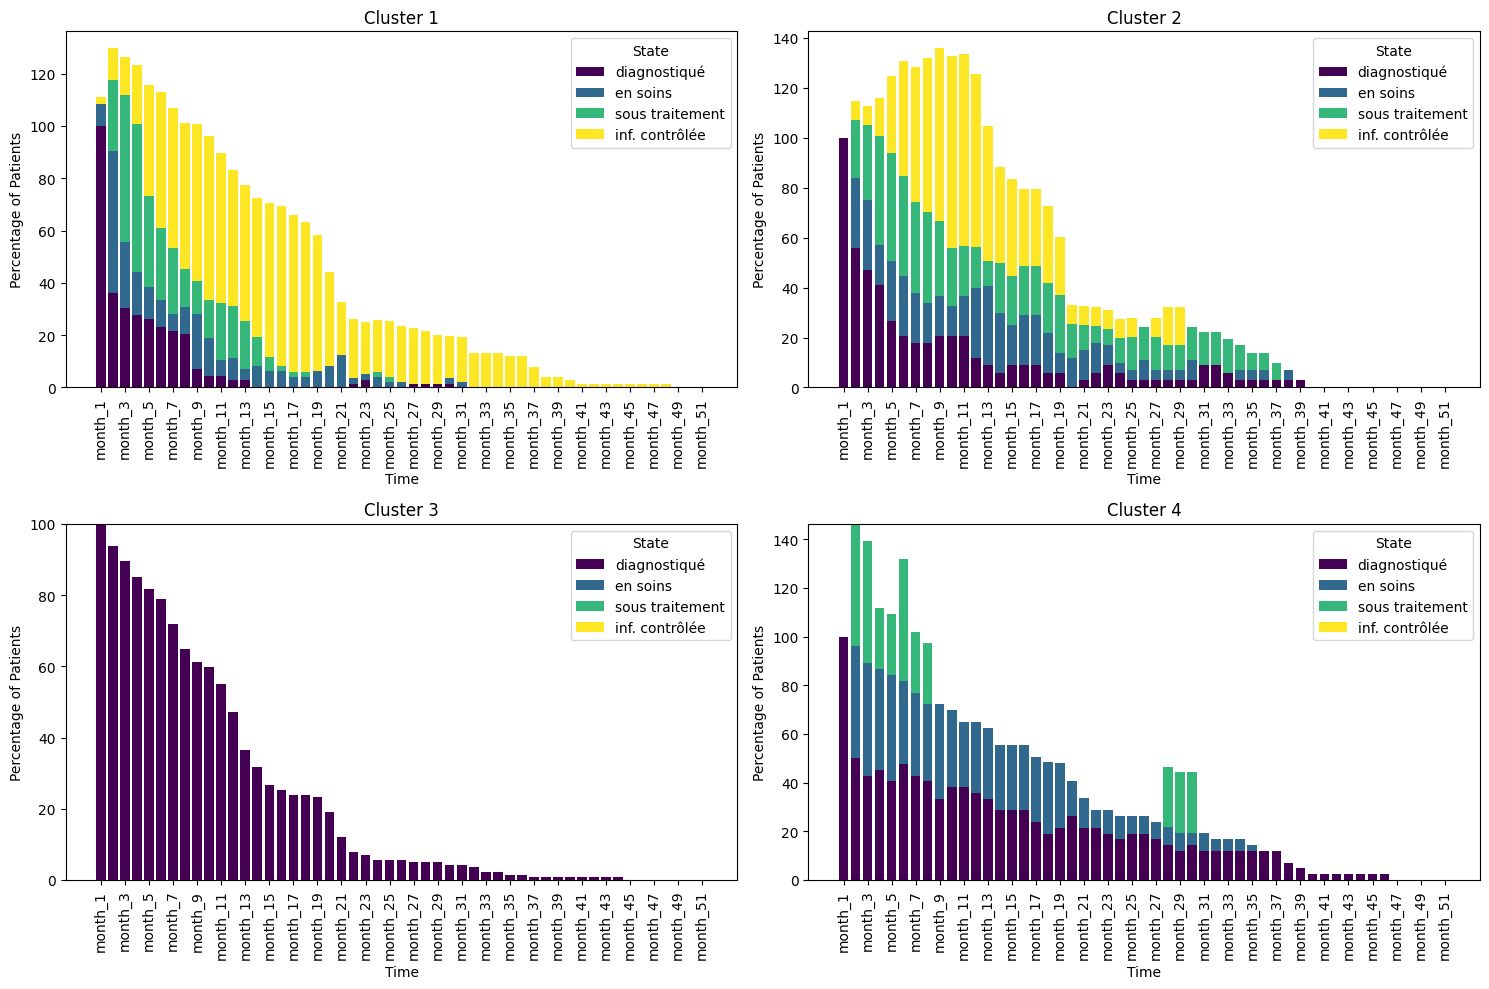

In [14]:
tca.bar_treatment_percentage(clusters=clusters)